# Data preprocessing and Cleaning

# 1 Missing values imputation

<b>1) Removal of Missing Data:</b> This is the simplest approach where rows or columns with missing values are removed entirely from the dataset. However, this can lead to loss of valuable information, especially if the missing data is substantial.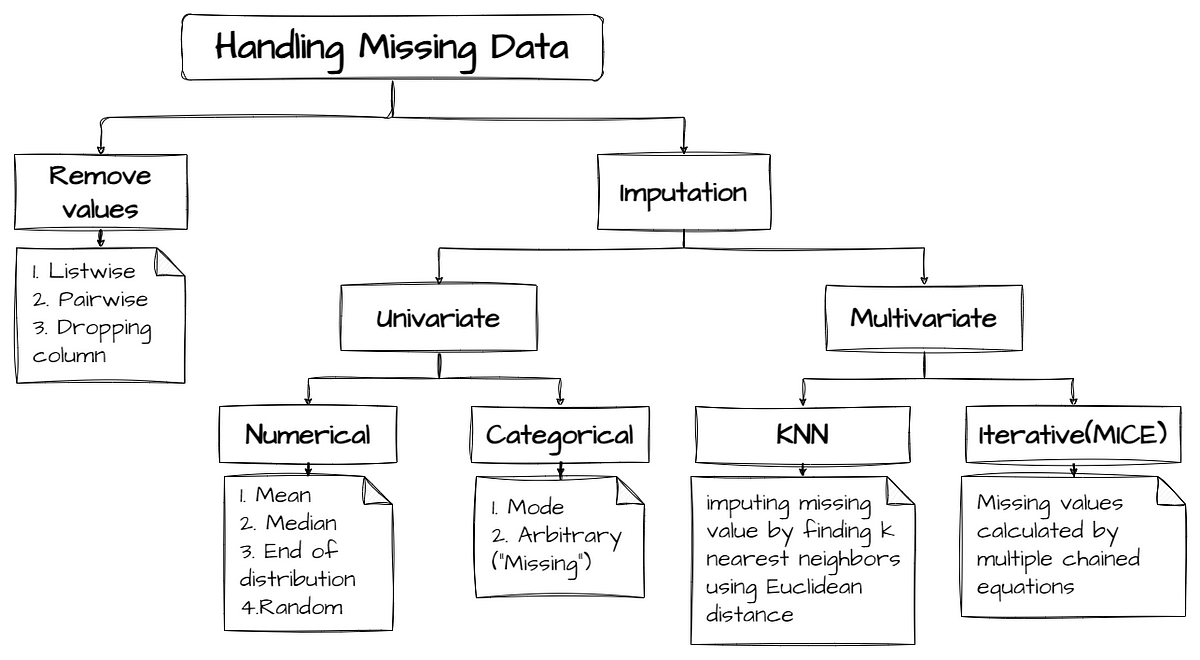

In [2]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/intenship/data.csv",usecols=["Age", "Fare", "Survived"])

df.columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

Original Age variable variance:  204.3495133904614
Age Variance after median imputation:  161.9895663346054
Age Variance after mean imputation:  161.81262452718673
Original Fare variable variance:  2368.2468324201386
Fare Variance after median imputation:  2368.2468324201386
Fare Variance after mean imputation:  2368.2468324201386


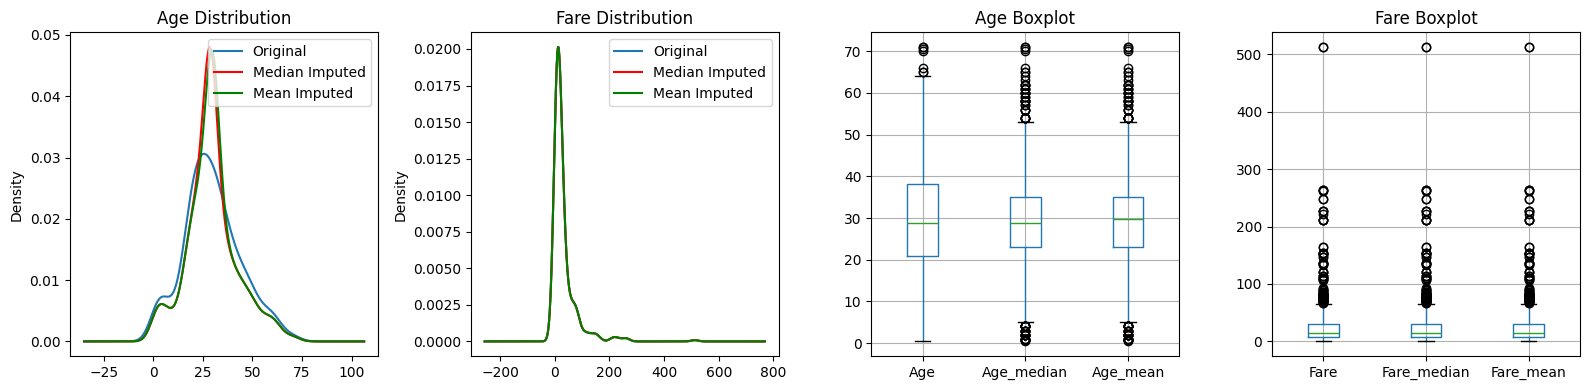

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

X = df.drop(columns=['Survived'])
y = df['Survived']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_fare)

print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

import matplotlib.pyplot as plt

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 4))

# Plot Age distributions
X_train['Age'].plot(kind='kde', ax=axes[0], label='Original')
X_train['Age_median'].plot(kind='kde', ax=axes[0], color='red', label='Median Imputed')
X_train['Age_mean'].plot(kind='kde', ax=axes[0], color='green', label='Mean Imputed')
axes[0].set_title('Age Distribution')
axes[0].legend()

# Plot Fare distributions
X_train['Fare'].plot(kind='kde', ax=axes[1], label='Original')
X_train['Fare_median'].plot(kind='kde', ax=axes[1], color='red', label='Median Imputed')
X_train['Fare_mean'].plot(kind='kde', ax=axes[1], color='green', label='Mean Imputed')
axes[1].set_title('Fare Distribution')
axes[1].legend()

# Plot Age boxplots
X_train[['Age', 'Age_median', 'Age_mean']].boxplot(ax=axes[2])
axes[2].set_title('Age Boxplot')

# Plot Fare boxplots
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot(ax=axes[3])
axes[3].set_title('Fare Boxplot')

plt.tight_layout()
plt.show()


In [ ]:
# prompt: write code to ignore warning]

import warnings
warnings.filterwarnings('ignore')


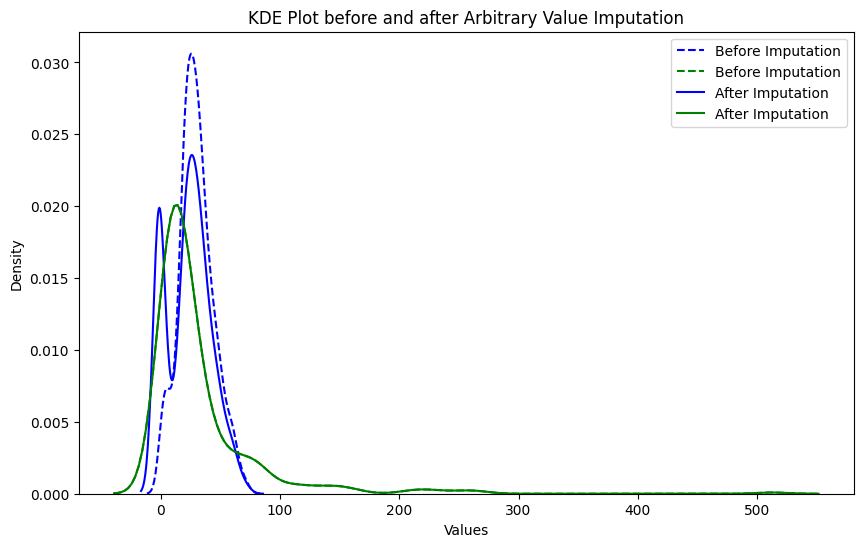

In [ ]:
import seaborn as sns
# Arbitrary value for imputation
arbitrary_value = -2

# Perform arbitrary value imputation
data_imputed = X_train.fillna(arbitrary_value)

# Plot KDE graph before and after imputation
plt.figure(figsize=(10, 6))

# KDE plot before imputation
sns.kdeplot(X_train['Age'], label='Before Imputation', color='blue', linestyle='--')
sns.kdeplot(X_train['Fare'], label='Before Imputation', color='green', linestyle='--')

# KDE plot after imputation
sns.kdeplot(data_imputed['Age'], label='After Imputation', color='blue')
sns.kdeplot(data_imputed['Fare'], label='After Imputation', color='green')

plt.xlabel('Values')
plt.ylabel('Density')
plt.title('KDE Plot before and after Arbitrary Value Imputation')
plt.legend()
plt.show()

# random impuatation

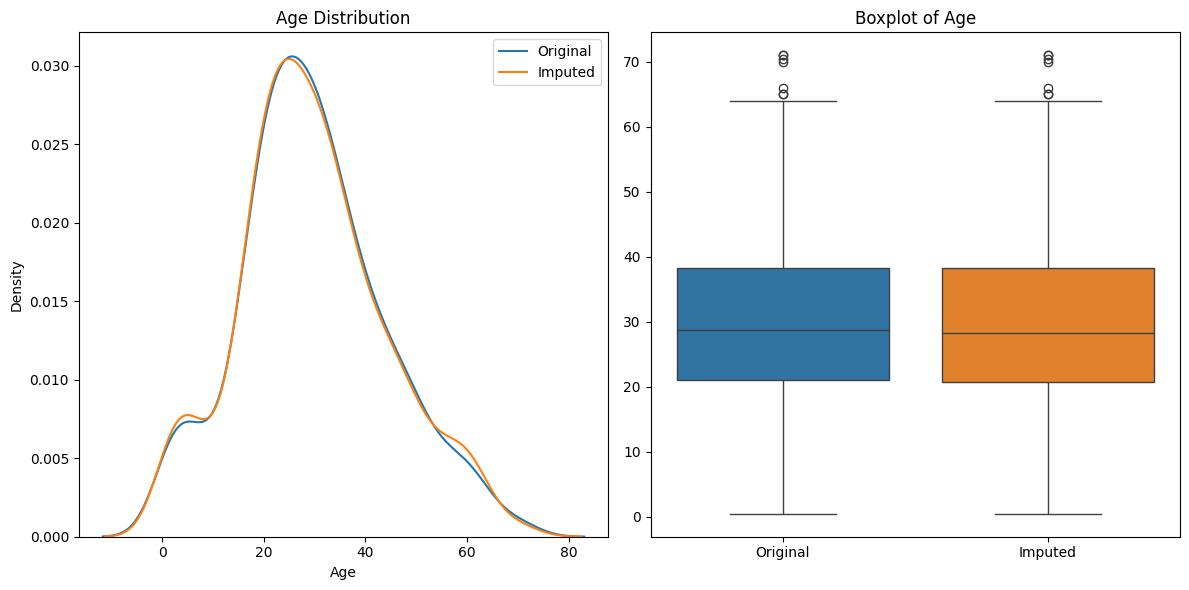

In [ ]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot original and imputed Age distributions using kdeplot
sns.kdeplot(data=X_train['Age'], label='Original', ax=axes[0])
sns.kdeplot(data=X_train['Age_imputed'], label='Imputed', ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].legend()

# Plot box plot for Age before and after imputation
sns.boxplot(data=[X_train['Age'], X_train['Age_imputed']], ax=axes[1])
axes[1].set_xticklabels(['Original', 'Imputed'])
axes[1].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

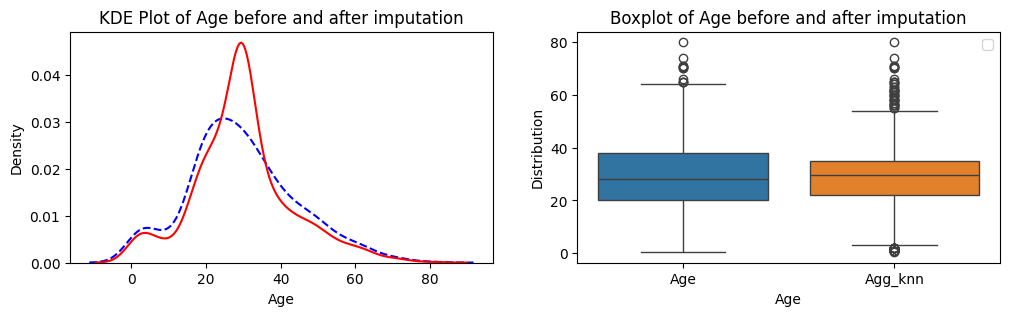

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=100)
data=pd.read_csv("/content/drive/MyDrive/intenship/data.csv")
data['Agg_knn'] = imputer.fit_transform(data[['Age']])
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 3))

# KDE plot before and after imputation
plt.subplot(1, 2, 1)
sns.kdeplot(data['Age'], label='Original Age', color='blue', linestyle='--')
sns.kdeplot(data['Agg_knn'], label='Imputed Age (KNN)', color='red')
plt.title('KDE Plot of Age before and after imputation')
plt.xlabel('Age')
plt.ylabel('Density')

# Box plot before and after imputation
plt.subplot(1, 2, 2)
sns.boxplot(data=[data['Age'], data['Agg_knn']])
plt.title('Boxplot of Age before and after imputation')
plt.xlabel('Age')
plt.ylabel('Distribution')

plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.impute import KNNImputer,SimpleImputer
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['Survived'])
y = df['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
knn = KNNImputer(n_neighbors=3,weights='distance')

X_train_trf = knn.fit_transform(X_train)
X_test_trf = knn.transform(X_test)
lr = LogisticRegression()

lr.fit(X_train_trf,y_train)

y_pred = lr.predict(X_test_trf)

accuracy_score(y_test,y_pred)

0.6033519553072626

https://colab.research.google.com/drive/1a6i9RL1ICwwQ8lYWEJwK5fhdEpS58oX1#scrollTo=fqYz1XZ9bIor

In [ ]:
# https://colab.research.google.com/drive/1a6i9RL1ICwwQ8lYWEJwK5fhdEpS58oX1#scrollTo=fqYz1XZ9bIor